In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime as d
import os
import pytz

In [2]:
loadDir = '/Users/edwardlrichards/cir_processing/Enviornment/processedData'
HST = pytz.timezone('US/Hawaii')
UTC = pytz.timezone('UTC')
majorLoc = dates.DayLocator(interval=1, tz=HST)
minorLoc = dates.HourLocator(byhour=[0,12], tz=HST)
majorFmt = dates.DateFormatter("%m/%d")

In [3]:
#VLA1
val1_temp1 = pd.read_pickle(os.path.join(loadDir,\
                    'VLA_%i_deploy_%iTemp.pic'%(1,1)))
val1_temp2 = pd.read_pickle(os.path.join(loadDir,\
                    'VLA_%i_deploy_%iTemp.pic'%(1,2)))
val1_temp3 = pd.read_pickle(os.path.join(loadDir,\
                    'VLA_%i_deploy_%iTemp.pic'%(1,3)))
#VLA2
val2_temp1 = pd.read_pickle(os.path.join(loadDir,\
                    'VLA_%i_deploy_%iTemp.pic'%(2,1)))
val2_temp2 = pd.read_pickle(os.path.join(loadDir,\
                    'VLA_%i_deploy_%iTemp.pic'%(2,2)))
val2_temp3 = pd.read_pickle(os.path.join(loadDir,\
                    'VLA_%i_deploy_%iTemp.pic'%(2,3)))

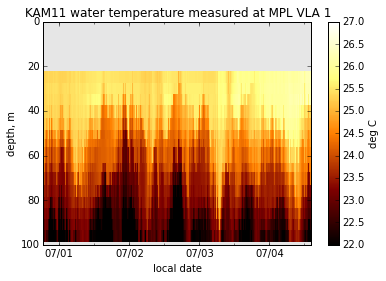

In [8]:
currentFile = val1_temp2
DT = np.tile(currentFile.index, (currentFile.columns.size, 1))
DEPTHS = np.tile(currentFile.columns, (currentFile.index.size, 1)).T
palette = cmap=plt.cm.afmhot
palette.set_bad(alpha=0)
fig, ax = plt.subplots()
ax.set_axis_bgcolor((0.9, 0.9, 0.9))
c = ax.pcolormesh(DT, DEPTHS, currentFile.values.T, vmin=22, vmax=27,
                 cmap=palette)
ax.xaxis.set_major_locator(majorLoc)
_ = ax.xaxis.set_minor_locator(minorLoc)
ax.xaxis.set_major_formatter(majorFmt)
cbar = fig.colorbar(c)
cbar.set_label('deg C')
_ = ax.set_ylim(100, 0)
_ = plt.title('KAM11 water temperature measured at MPL VLA 1')
_ = plt.xlabel('local date')
_ = plt.ylabel('depth, m')
_ = plt.savefig('/Users/edwardlrichards/Desktop/MPL_Interns_07_01/VLA1_temp')